In [5]:
import inspect
import gt
import experiment
import numpy as np

# Get all functions from gt.py and experiment.py
gt_functions = [obj for name, obj in inspect.getmembers(gt) if inspect.isfunction(obj)]
experiment_functions = [obj for name, obj in inspect.getmembers(experiment) if inspect.isfunction(obj)]

# Define the number of tests and matrix dimensions
num_tests = 1
max_rows = 5
max_cols = 5

# Function to generate random matrix
def generate_random_matrix(rows, cols):
    return np.random.rand(rows, cols)

c=0

# Iterate over each function and test
for gt_func, exp_func in zip(gt_functions, experiment_functions):
    print(f"Testing function {gt_func.__name__}...")
    for _ in range(num_tests):
        rows = np.random.randint(1, max_rows + 1)
        cols = np.random.randint(1, max_cols + 1)
        A = generate_random_matrix(rows, cols)

        # Determine the number of parameters the function takes
        num_params = len(inspect.signature(gt_func).parameters)

        try:
            if num_params == 1:
                gt_output = gt_func(A)
                exp_output = exp_func(A)
            # elif num_params == 2:
            #     param = np.random.uniform(0.1, 2.0)  # Adjust the parameter range as needed
            #     gt_output = gt_func(A, param)
            #     exp_output = exp_func(A, param)
            # elif num_params == 4:
            #     k = np.random.uniform(0.1, 2.0)  # Adjust the parameter range as needed
            #     i = np.random.randint(0, rows)
            #     j = np.random.randint(0, cols)
            #     gt_output = gt_func(A, k, i, j)
            #     exp_output = exp_func(A, k, i, j)
            else:
                raise ValueError(f"Function {gt_func.__name__} has unsupported parameters.")

            if not np.allclose(gt_output, exp_output):
                print(f"Function {gt_func.__name__} failed a test.")
                break
        except Exception as e:
            print(f"Function {gt_func.__name__} encountered an error: {e}")
    else:
        c+=1
        print(f"Function {gt_func.__name__} passed all tests.")

print(f"All functions have been tested.{c}")


Testing function function_00...
Function function_00 encountered an error: Function function_00 has unsupported parameters.
Function function_00 passed all tests.
Testing function function_01...
Function function_01 encountered an error: Function function_01 has unsupported parameters.
Function function_01 passed all tests.
Testing function function_02...
Function function_02 passed all tests.
Testing function function_03...
Function function_03 encountered an error: Function function_03 has unsupported parameters.
Function function_03 passed all tests.
Testing function function_04...
Function function_04 encountered an error: Function function_04 has unsupported parameters.
Function function_04 passed all tests.
Testing function function_05...
Function function_05 passed all tests.
Testing function function_06...
Function function_06 passed all tests.
Testing function function_07...
Function function_07 encountered an error: index 1 is out of bounds for axis 0 with size 1
Function fun

In [11]:
import importlib.util
import numpy as np

# Function to import module from file
def import_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

# Import the modules
experiment = import_from_file('experiment', 'experiment.py')
gt = import_from_file('gt', 'gt.py')

# Function to get functions that take a single matrix as input
def get_single_matrix_functions(module):
    single_matrix_functions = {}
    for attr_name in dir(module):
        attr = getattr(module, attr_name)
        if callable(attr):
            num_args = attr.__code__.co_argcount - ('self' in attr.__code__.co_varnames)
            if num_args == 1:
                single_matrix_functions[attr_name] = attr
    return single_matrix_functions

experiment_funcs = get_single_matrix_functions(experiment)
gt_funcs = get_single_matrix_functions(gt)

matching_funcs = set(experiment_funcs.keys()).intersection(gt_funcs.keys())

# Function to compare outputs of two functions
def compare_functions(func1, func2, matrix):
    try:
        result1 = func1(matrix)
        result2 = func2(matrix)
        if isinstance(result1, np.ndarray) and isinstance(result2, np.ndarray):
            # print(f"gt {result1}, exp {result2}")
            return np.array_equal(result1, result2)
        else:
            return np.allclose(result1, result2, equal_nan=True)
    except Exception as e:
        # print(f"Error comparing functions {func1.__name__} and {func2.__name__}: {e}")
        return False

# Generate a random matrix
def generate_random_matrix(size=(10, 10)):
    return np.random.rand(*size)

# Number of tests
num_tests = 100

# Dictionary for accuracy results
accuracy_dict = {}

# Test each function
for func_name in matching_funcs:
    matches = 0
    for _ in range(num_tests):
        random_matrix = generate_random_matrix()
        if compare_functions(experiment_funcs[func_name], gt_funcs[func_name], random_matrix):
            matches += 1
    accuracy = matches / num_tests
    accuracy_dict[func_name] = accuracy

# Print accuracy
c = 0
for func_name, accuracy in accuracy_dict.items():
    if accuracy == 1:
        c+=1
    print(f"Accuracy for {func_name}: {accuracy:.2f}")
print(f"{len(accuracy_dict.items())}")
print(f"{c/len(accuracy_dict.items())}")

Accuracy for function_65: 1.00
Accuracy for function_10: 1.00
Accuracy for function_02: 1.00
Accuracy for function_25: 0.00
Accuracy for function_58: 1.00
Accuracy for function_71: 1.00
Accuracy for function_36: 0.00
Accuracy for function_60: 0.00
Accuracy for function_34: 1.00
Accuracy for function_95: 1.00
Accuracy for function_87: 1.00
Accuracy for function_06: 1.00
Accuracy for function_48: 1.00
Accuracy for function_50: 1.00
Accuracy for function_61: 1.00
Accuracy for function_20: 1.00
Accuracy for function_28: 1.00
Accuracy for function_32: 1.00
Accuracy for function_27: 1.00
Accuracy for function_46: 1.00
Accuracy for function_62: 1.00
Accuracy for function_72: 1.00
Accuracy for function_75: 1.00
Accuracy for function_11: 1.00
Accuracy for function_82: 1.00
Accuracy for function_23: 1.00
Accuracy for function_92: 1.00
Accuracy for function_96: 1.00
Accuracy for function_42: 1.00
Accuracy for function_70: 1.00
Accuracy for function_89: 1.00
Accuracy for function_64: 1.00
Accuracy

In [1]:
import importlib.util
import numpy as np
import time

# Function to import module from file
def import_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

# Import the modules
experiment = import_from_file('experiment', 'experiment.py')
gt = import_from_file('gt', 'gt.py')

# Function to get functions that take a single matrix as input
def get_single_matrix_functions(module):
    single_matrix_functions = {}
    for attr_name in dir(module):
        attr = getattr(module, attr_name)
        if callable(attr):
            num_args = attr.__code__.co_argcount - ('self' in attr.__code__.co_varnames)
            if num_args == 1:
                single_matrix_functions[attr_name] = attr
    return single_matrix_functions

experiment_funcs = get_single_matrix_functions(experiment)
gt_funcs = get_single_matrix_functions(gt)

matching_funcs = set(experiment_funcs.keys()).intersection(gt_funcs.keys())

# Function to compare outputs of two functions
def compare_functions(func1, func2, matrix):
    try:
        start_time = time.time()  # Start time
        result1 = func1(matrix)
        end_time = time.time()  # End time for function 1
        elapsed_time_func1 = end_time - start_time

        start_time = time.time()  # Restart time for function 2
        result2 = func2(matrix)
        end_time = time.time()  # End time for function 2
        elapsed_time_func2 = end_time - start_time

        if isinstance(result1, np.ndarray) and isinstance(result2, np.ndarray):
            return np.array_equal(result1, result2), elapsed_time_func1, elapsed_time_func2
        else:
            return np.allclose(result1, result2, equal_nan=True), elapsed_time_func1, elapsed_time_func2
    except Exception as e:
        # print(f"Error comparing functions {func1.__name__} and {func2.__name__}: {e}")
        return False, 0, 0

# Generate a random matrix
def generate_random_matrix(size=(200, 200)):
    return np.random.rand(*size)

# Number of tests
num_tests = 1

# Dictionary for accuracy results
performance_dict = {}

# Test each function
for func_name in matching_funcs:
    matches = 0
    total_time_func1 = 0
    total_time_func2 = 0
    for _ in range(num_tests):
        random_matrix = generate_random_matrix()
        result_equal, time_func1, time_func2 = compare_functions(experiment_funcs[func_name], gt_funcs[func_name], random_matrix)
        if result_equal:
            matches += 1
        total_time_func1 += time_func1
        total_time_func2 += time_func2
    accuracy = matches / num_tests
    average_time_func1 = total_time_func1 / num_tests
    average_time_func2 = total_time_func2 / num_tests
    performance_dict[func_name] = (accuracy, average_time_func1, average_time_func2)

# Print accuracy, time for experiment and gt functions
for func_name, (accuracy, avg_time_func1, avg_time_func2) in performance_dict.items():
    print(f"Function {func_name}: Accuracy: {accuracy:.2f}, "
          f"Avg. Time Func1: {avg_time_func1:.4f}s, Avg. Time Func2: {avg_time_func2:.4f}s")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Function function_64: Accuracy: 1.00, Avg. Time Func1: 0.0005s, Avg. Time Func2: 0.0235s
Function function_23: Accuracy: 1.00, Avg. Time Func1: 0.0000s, Avg. Time Func2: 0.0079s
Function function_05: Accuracy: 1.00, Avg. Time Func1: 0.0000s, Avg. Time Func2: 0.0112s
Function function_45: Accuracy: 1.00, Avg. Time Func1: 0.0000s, Avg. Time Func2: 0.0000s
Function function_30: Accuracy: 1.00, Avg. Time Func1: 0.0002s, Avg. Time Func2: 0.0047s
Function function_82: Accuracy: 1.00, Avg. Time Func1: 

In [1]:
function_arg_types = {
    'function_00': ['np.ndarray', 'np.ndarray'],
    'function_01': ['np.ndarray', 'np.ndarray'],
    'function_02': ['np.ndarray'],
    'function_03': ['np.ndarray', 'np.ndarray'],
    'function_04': ['np.ndarray', 'np.ndarray'],
    'function_05': ['np.ndarray'],
    'function_06': ['np.ndarray'],
    'function_07': ['np.ndarray'],
    'function_08': ['np.ndarray', 'np.ndarray'],
    'function_09': ['np.ndarray', 'np.ndarray'],
    'function_10': ['np.ndarray'],
    'function_11': ['np.ndarray'],
    'function_12': ['np.ndarray', 'np.ndarray'],
    'function_13': ['np.ndarray', 'np.ndarray'],
    'function_14': ['np.ndarray'],
    'function_15': ['np.ndarray'],
    'function_16': ['np.ndarray', 'np.ndarray'],
    'function_17': ['np.ndarray'],
    'function_18': ['np.ndarray', 'np.ndarray'],
    'function_19': ['np.ndarray'],
    'function_20': ['np.ndarray'],
    'function_21': ['np.ndarray'],
    'function_22': ['np.ndarray'],
    'function_23': ['np.ndarray'],
    'function_24': ['int', 'int'],
    'function_25': ['int'],
    'function_26': ['np.ndarray'],
    'function_27': ['np.ndarray'],
    'function_28': ['np.ndarray'],
    'function_29': ['np.ndarray', 'np.array'],
    'function_30': ['np.ndarray'],
    'function_31': ['np.ndarray'],
    'function_32': ['np.ndarray'],
    'function_33': ['np.ndarray'],
    'function_34': ['np.ndarray'],
    'function_35': ['np.ndarray'],
    'function_36': ['np.ndarray'],
    'function_37': ['np.ndarray'],
    'function_38': ['np.ndarray'],
    'function_39': ['np.ndarray'],
    'function_40': ['np.ndarray'],
    'function_41': ['np.ndarray', 'np.ndarray'],
    'function_42': ['np.ndarray'],
    'function_43': ['np.ndarray', 'int', 'int', 'int'],
    'function_44': ['np.ndarray'],
    'function_45': ['np.ndarray'],
    'function_46': ['np.ndarray'],
    'function_47': ['np.ndarray', 'np.ndarray'],
    'function_48': ['np.ndarray'],
    'function_49': ['np.ndarray'],
    'function_50': ['np.ndarray'],
    'function_51': ['np.ndarray'],
    'function_52': ['np.ndarray'],
    'function_53': ['np.ndarray'],
    'function_54': ['np.ndarray', 'float'],
    'function_55': ['np.ndarray', 'int'],
    'function_56': ['np.ndarray', 'float', 'float'],
    'function_57': ['np.ndarray'],
    'function_58': ['np.ndarray'],
    'function_59': ['np.ndarray'],
    'function_60': ['np.ndarray'],
    'function_61': ['np.ndarray'],
    'function_62': ['np.ndarray'],
    'function_63': ['np.ndarray'],
    'function_64': ['np.ndarray'],
    'function_65': ['np.ndarray'],
    'function_66': ['np.ndarray'],
    'function_67': ['np.ndarray'],
    'function_68': ['np.ndarray'],
    'function_69': ['np.ndarray', 'float', 'float'],
    'function_70': ['np.ndarray'],
    'function_71': ['np.ndarray'],
    'function_72': ['np.ndarray'],
    'function_73': ['np.ndarray'],
    'function_74': ['np.ndarray'],
    'function_75': ['np.ndarray'],
    'function_76': ['np.ndarray'],
    'function_77': ['np.ndarray', 'int'],
    'function_78': ['np.ndarray', 'int'],
    'function_79': ['np.ndarray', 'float'],
    'function_80': ['np.ndarray'],
    'function_81': ['np.ndarray'],
    'function_82': ['np.ndarray'],
    'function_83': ['np.ndarray'],
    'function_84': ['np.ndarray', 'np.ndarray'],
    'function_85': ['np.ndarray'],
    'function_86': ['np.ndarray', 'int'],
    'function_87': ['np.ndarray'],
    'function_88': ['np.ndarray'],
    'function_89': ['np.ndarray'],
    'function_90': ['np.ndarray'],
    'function_91': ['np.ndarray'],
    'function_92': ['np.ndarray'],
    'function_93': ['np.ndarray'],
    'function_94': ['np.ndarray'],
    'function_95': ['np.ndarray'],
    'function_96': ['np.ndarray'],
    'function_97': ['np.ndarray', 'np.ndarray'],
    'function_98': ['np.ndarray', 'np.ndarray'],
    'function_99': ['np.ndarray', 'int'],
}


In [21]:
import importlib.util
import numpy as np
import time
import inspect

SIZE = 100
# Function to import module from file
def import_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

# Import the modules
experiment = import_from_file('experiment', 'gt.py')
gt = import_from_file('gt', 'experiment.py')


# Function to generate random input based on specified types
def generate_random_input(input_type):
    if input_type == 'np.ndarray':
        return generate_random_matrix()
    elif input_type == 'np.array':
        return generate_random_array()
    elif input_type == 'int':
        return np.random.randint(0, 10)
    elif input_type == 'float':
        return 10 * np.random.random()
    # Add more types as needed
    else:
        raise ValueError(f"Unsupported input type: {input_type}")

# Generate a random matrix
def generate_random_matrix(size=(SIZE, SIZE)):
    return np.random.rand(*size)

def generate_random_array(size=(SIZE,)):
    return np.random.rand(*size)

# Function to get all functions from a module
def get_functions(module):
    functions = {}
    for attr_name in dir(module):
        attr = getattr(module, attr_name)
        if callable(attr):
            functions[attr_name] = attr
    return functions

experiment_funcs = get_functions(experiment)
gt_funcs = get_functions(gt)

# Function to test and compare outputs of two functions
def test_and_compare_functions(func1, func2, inputs):
    try:
        result1 = func1(*inputs)
        result2 = func2(*inputs)
        if isinstance(result1, np.ndarray) and isinstance(result2, np.ndarray):
            return np.array_equal(result1, result2)
        else:
            return np.allclose(result1, result2, equal_nan=True)
    except Exception as e:
        print(f"Error comparing functions {func1.__name__} and {func2.__name__}: {e}")
        return False

# Function to run the tests
def run_tests():
    performance_dict = {}

    # Pre-generate inputs for all functions before timing
    pregenerated_inputs = {
        func_name: [generate_random_input(arg_type) for arg_type in function_arg_types.get(func_name)]
        for func_name in function_arg_types
    }

    # For each function in the experiment module
    for func_name, func in experiment_funcs.items():
        if func_name in gt_funcs:
            gt_func = gt_funcs[func_name]
            inputs = pregenerated_inputs.get(func_name)

            if not inputs:
                print(f"No inputs generated for function {func_name}, skipping.")
                continue

            # Test the function num_tests times
            matches = 0
            total_time_experiment = 0
            total_time_gt = 0
            for _ in range(num_tests):
                # Ensure the same inputs are used for both functions
                inputs_copy = [np.copy(input) for input in inputs]

                start_time = time.perf_counter()
                if test_and_compare_functions(func, gt_func, inputs_copy):
                    matches += 1
                total_time_experiment += time.perf_counter() - start_time

                start_time = time.perf_counter()
                gt_func(*inputs_copy)
                total_time_gt += time.perf_counter() - start_time

            # Store the performance results
            accuracy = matches / num_tests
            average_time_experiment = total_time_experiment / num_tests
            average_time_gt = total_time_gt / num_tests
            performance_dict[func_name] = (accuracy, average_time_experiment, average_time_gt)

    # Print the performance results
    for func_name, (accuracy, avg_time_exp, avg_time_gt) in performance_dict.items():
        print(f"Function {func_name}: Accuracy: {accuracy:.2f}, "
              f"Avg. Time Exp: {avg_time_exp:.4f}s, Avg. Time GT: {avg_time_gt:.4f}s")


    return performance_dict


# Number of tests
num_tests = 1

performance_dict = run_tests()


Function function_00: Accuracy: 0.00, Avg. Time Exp: 0.0173s, Avg. Time GT: 0.0014s
Function function_01: Accuracy: 1.00, Avg. Time Exp: 0.0252s, Avg. Time GT: 0.0002s
Function function_02: Accuracy: 1.00, Avg. Time Exp: 0.0050s, Avg. Time GT: 0.0000s
Function function_03: Accuracy: 1.00, Avg. Time Exp: 0.0101s, Avg. Time GT: 0.0000s
Function function_04: Accuracy: 0.00, Avg. Time Exp: 7.9626s, Avg. Time GT: 0.0001s
Function function_05: Accuracy: 1.00, Avg. Time Exp: 0.0091s, Avg. Time GT: 0.0000s
Function function_06: Accuracy: 1.00, Avg. Time Exp: 0.0040s, Avg. Time GT: 0.0000s
Function function_07: Accuracy: 1.00, Avg. Time Exp: 0.0029s, Avg. Time GT: 0.0000s
Function function_08: Accuracy: 1.00, Avg. Time Exp: 0.4954s, Avg. Time GT: 0.0001s
Function function_09: Accuracy: 1.00, Avg. Time Exp: 0.0126s, Avg. Time GT: 0.0000s
Function function_10: Accuracy: 1.00, Avg. Time Exp: 0.0157s, Avg. Time GT: 0.0000s
Function function_11: Accuracy: 1.00, Avg. Time Exp: 0.0043s, Avg. Time GT: 

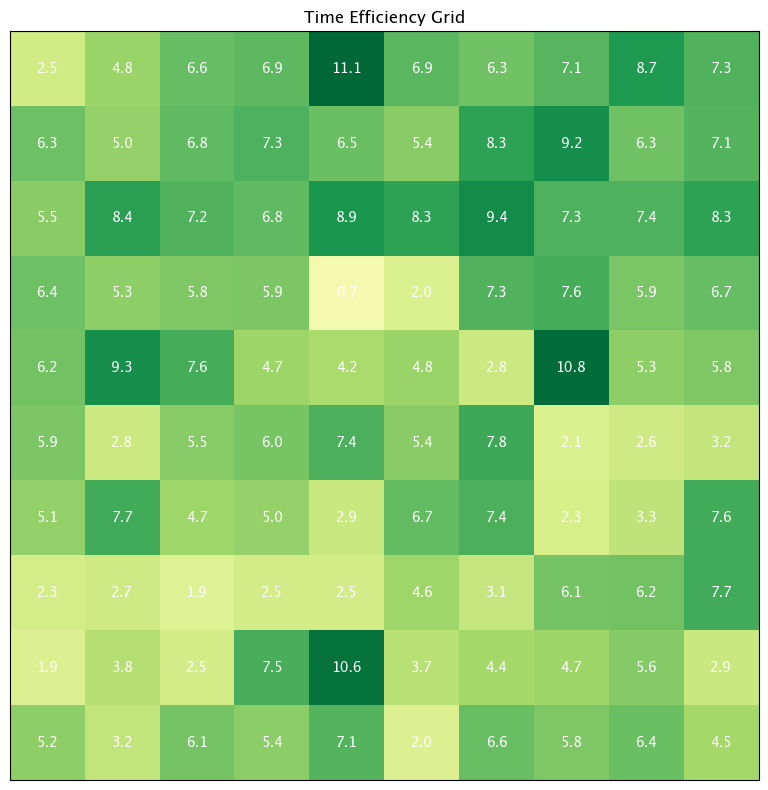

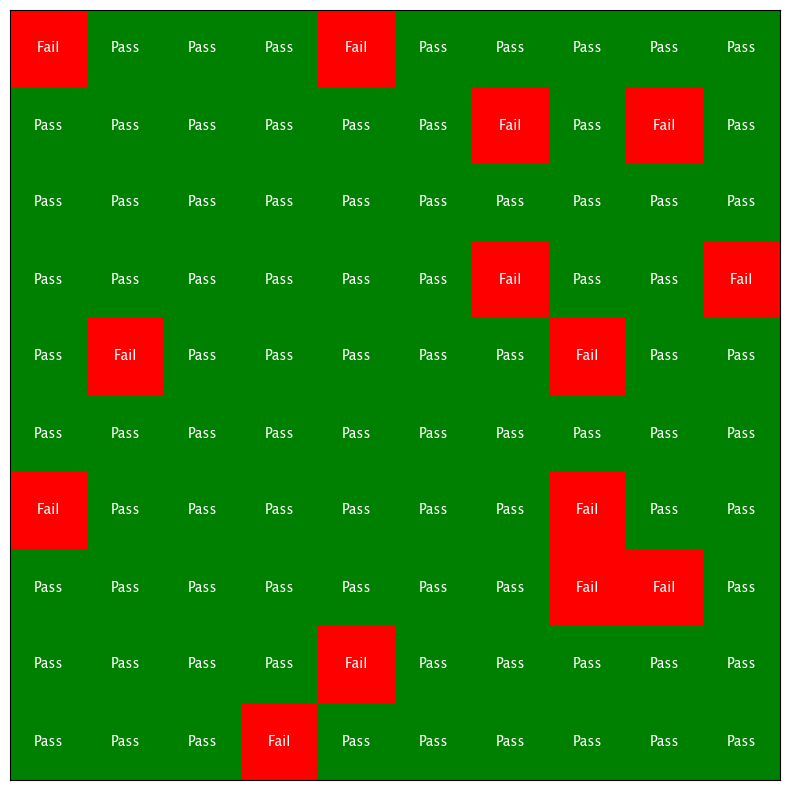

In [49]:
import matplotlib.pyplot as plt

# Assuming performance_dict is populated with your test results
# performance_dict = {...}

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_accuracy(performance_dict):
    # Assume accuracy is the first element in the values list for each key in the dictionary
    accuracies = np.array([performance_dict[func][0] for func in performance_dict])

    # Reshape the accuracies to a 10x10 grid
    accuracies_grid = accuracies.reshape((10, 10))

    # Create a color map for 0 and 1
    cmap = ListedColormap(['red', 'green'])

    # Plot the accuracy grid
    plt.figure(figsize=(8, 8))
    plt.imshow(accuracies_grid, cmap=cmap, aspect='equal')

    # Optionally, add a grid line around the cells
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    plt.xticks([])
    plt.yticks([])  # Hide the ticks

    # Optionally, add annotations within the squares
    for i in range(10):
        for j in range(10):
            plt.text(j, i, 'Pass' if accuracies_grid[i, j] == 1 else 'Fail', ha='center', va='center', color='white')

    plt.tight_layout()
    plt.savefig('Accuracy_Grid.png')
    plt.show()

# def plot_performance(performance_dict):
#     # Splitting the dictionary into lists for plotting
#     functions = list(performance_dict.keys())
#     accuracies = [performance_dict[func][0] for func in functions]
#     exp_times = [performance_dict[func][2] for func in functions]
#     gt_times = [performance_dict[func][1] for func in functions]
#
#     # Plot accuracy
#     plt.figure(figsize=(14, 7))
#     plt.bar(functions, accuracies, color='blue')
#     plt.xlabel('Function')
#     plt.ylabel('Accuracy')
#     plt.title('Accuracy of Functions')
#     plt.ylim(0, 1.1)  # Accuracy ranges between 0 and 1
#     plt.xticks(rotation=90)  # Rotate the function names to prevent overlap
#     plt.tight_layout()
#     plt.savefig('Accuracy 1')
#     plt.show()
#
#     # Plot time efficiency
#     fig, ax = plt.subplots(2, 1, figsize=(14, 14), sharex=True)
#
#     # Experiment times
#     ax[0].bar(functions, exp_times, color='green')
#     ax[0].set_ylabel('Experiment Time (s)')
#     ax[0].set_title('Time Efficiency (GPT 3.5)')
#
#     # Ground truth times
#     ax[1].bar(functions, gt_times, color='red')
#     ax[1].set_ylabel('Ground Truth Time (s)')
#     ax[1].set_title('Time Efficiency (Ground Truth)')
#
#     # Set common attributes
#     plt.xlabel('Function')
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.savefig('Time 1')
#     plt.show()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm
from matplotlib.cm import Reds, Greens

def plot_performance(performance_dict):
    functions = list(performance_dict.keys())
    accuracies = [performance_dict[func][0] for func in functions]
    exp_times = [performance_dict[func][2] for func in functions]
    gt_times = [performance_dict[func][1] for func in functions]

    # Calculate the natural log of the ratio of gt_time to exp_time
    time_ratios = np.log(np.divide(gt_times, exp_times))

    # Reshape the time_ratios to a 10x10 grid
    time_ratios_grid = time_ratios.reshape((10, 10))

    # Normalize the color map around 0 so that positive values are green and negative values are red
    norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=np.max(time_ratios_grid))

    # Plot the time efficiency grid
    plt.figure(figsize=(8, 8))
    plt.imshow(time_ratios_grid, cmap='RdYlGn', norm=norm, aspect='equal')

    # Optionally, add a grid line around the cells
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    plt.xticks([])
    plt.yticks([])  # Hide the ticks

    # Optionally, add annotations within the squares
    for i in range(10):
        for j in range(10):
            rounded_value = round(time_ratios_grid[i, j], 1)
            color = 'white' if rounded_value > 0 else 'black'  # White text for green background, black for red
            plt.text(j, i, f'{rounded_value:.1f}', ha='center', va='center', color=color)

    plt.title('Time Efficiency Grid')
    plt.tight_layout()
    plt.savefig('Time_Efficiency_Grid.png')
    plt.show()

# Call this function after your run_tests() function to plot the results
plot_performance(performance_dict)
plot_accuracy(performance_dict)


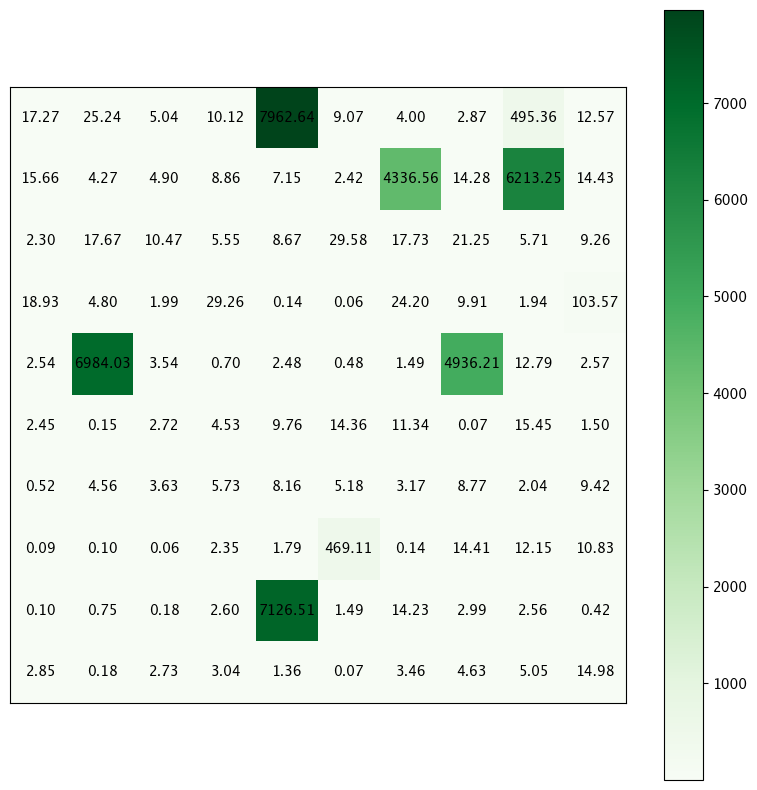

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_time_ratios_heatmap(performance_dict):
    # Extract the experiment and ground truth times from the performance dictionary
    exp_times = [performance_dict[func][2] for func in performance_dict]
    gt_times = [performance_dict[func][1] for func in performance_dict]

    # Calculate the natural log of the ratio of gt_time to exp_time
    time_ratios = np.log(np.divide(gt_times, exp_times))

    # Reshape the time_ratios to a 10x10 grid
    time_ratios_grid = np.array(gt_times).reshape((10, 10))
    time_ratios_grid = np.multiply(time_ratios_grid,1000)

    # Plot the time ratios as a heatmap
    plt.figure(figsize=(8, 8))
    norm = Normalize(vmin=np.min(time_ratios_grid), vmax=np.max(time_ratios_grid))  # Normalize the color scale
    plt.imshow(time_ratios_grid, cmap='Greens', norm=norm, aspect='equal')

    # Optionally, add a grid line around the cells
    plt.grid(which='major', axis='both', linestyle='-', color='white', linewidth=0.5)
    plt.xticks([])
    plt.yticks([])  # Hide the ticks

    # Optionally, add annotations within the squares
    for i in range(10):
        for j in range(10):
            plt.text(j, i, f'{time_ratios_grid[i, j]:.2f}', ha='center', va='center', color='black')

    # plt.title('Time Ratios Heatmap')
    plt.colorbar()  # Show color scale
    plt.tight_layout()
    plt.savefig('Time_Heatmap.png')
    plt.show()

# This is a placeholder for the performance_dict you would pass to the function
# performance_dict = {...}

# Uncomment the following line and pass your actual performance_dict to plot the heatmap
plot_time_ratios_heatmap(performance_dict)


In [60]:
def function_04(A, s):
    return np.multiply(A, s)

def function_04_gt(A, s):
    result = [[0] * len(A[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            result[i][j] = A[i][j] * s
    return result

A = generate_random_matrix((3,3))
print(function_04(A,3))
print(function_04_gt(A,3))


[[2.66160257 1.50689183 1.23507806]
 [0.10294621 0.27548767 0.7303075 ]
 [1.51848097 1.84407941 2.02797627]]
[[2.6616025659985354, 1.506891830979567, 1.2350780573297164], [0.1029462050600064, 0.27548766928218515, 0.7303075015519251], [1.5184809697652337, 1.844079406683644, 2.027976269677378]]
